#### Title: Telco Customer Churn Prediction
**By: Marlon Kolivas** <br>
**Client: F888 Mobile**

### Objective:
This project focuses on building a **machine learning model** to predict customer churn in the telecommunications industry. Customer churn occurs when a customer discontinues a company’s services. By identifying the factors that contribute to churn, telecom companies can take proactive steps to retain customers, reduce revenue loss, and improve customer satisfaction.

### Dataset Description
The dataset used in this project contains various customer attributes, including **demographic information** (such as gender, seniority, and marital status), **account details** (like contract type, payment method, and tenure), and **service usage patterns** (such as internet service type, monthly charges, and total charges).

The goal is to analyze these features, uncover insights into why customers leave, and build a predictive model that accurately identifies customers at high risk of churn. The final solution will include a Streamlit dashboard that allows users to explore data insights and make real-time churn predictions based on customer input.




#### Import libraries

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score

#### Load and explore data

In [22]:
# Load the dataset
telco = pd.read_csv("data/telco_customer_churn.csv")

In [23]:
# Display the first 5 rows
display(telco.head()) 

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [24]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [25]:
# Inspect the dataset
print("Shape of dataset:", telco.shape)
print("\nColumns in dataset:", telco.columns.tolist())

Shape of dataset: (7043, 21)

Columns in dataset: ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']


In [26]:
# Summary statistics
print("\nDataset summary statistics:")
display(telco.describe(include='all'))


Dataset summary statistics:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,6531,2
top,7590-VHVEG,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


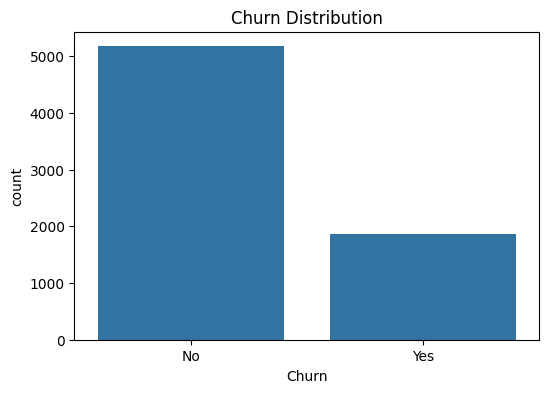

In [27]:
# #uick visualization of churn distribution
plt.figure(figsize=(6,4))
sns.countplot(x='Churn', data=telco)
plt.title('Churn Distribution')
plt.show()

### Exploratory Data Analysis
This stage involves preparing the raw dataset for analysis and model trainimg by ensuring data quality, consistency, and suitability for machine learning algorithms. Real-world data often contains missing values, duplicate records, inconsistent formatting, or irrelevant features — all of which can negatively affect model performance.


In [28]:
# Check for duplicate rows
duplicates = telco.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")

# Remove duplicates
telco = telco.drop_duplicates()

# Verify removal
print(f"Shape of dataset after removing duplicates: {telco.shape}")


Number of duplicate rows: 0
Shape of dataset after removing duplicates: (7043, 21)


In [29]:
# Show Basic Information of the dataset
print("Dataset shape:", telco.shape)
print("\nColumn names:", telco.columns.tolist())

Dataset shape: (7043, 21)

Column names: ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']


In [30]:
# Missing values check
missing_counts = telco.isnull().sum()
missing_percentage = (missing_counts / len(telco)) * 100
missing_df = pd.DataFrame({'Missing Count': missing_counts, 'Percentage': missing_percentage})
print("\nMissing values per column:")
display(missing_df)


Missing values per column:


,Missing Count,Percentage
customerID,0,0.0
gender,0,0.0
SeniorCitizen,0,0.0
Partner,0,0.0
Dependents,0,0.0
tenure,0,0.0
PhoneService,0,0.0
MultipleLines,0,0.0
InternetService,0,0.0
OnlineSecurity,0,0.0


In [31]:
# Separate numerical and categorical columns
numeric_cols = telco.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = telco.select_dtypes(include=['object']).columns.tolist()

In [32]:
# Descriptive statistics
print("\n--- Numerical Columns ---")
num_desc = telco[numeric_cols].describe()
display(num_desc)

# Interpretation: flag potential outliers and skewness
for col in numeric_cols:
    mean = telco[col].mean()
    median = telco[col].median()
    min_val = telco[col].min()
    max_val = telco[col].max()
    print(f"{col}: mean={mean:.2f}, median={median:.2f}, min={min_val}, max={max_val}")
    if mean > median:
        print("  → Right-skewed")
    elif mean < median:
        print("  → Left-skewed")
    # Outlier flagging (1.5*IQR rule)
    Q1 = telco[col].quantile(0.25)
    Q3 = telco[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    outliers = telco[(telco[col] < lower) | (telco[col] > upper)]
    print(f"  → Number of potential outliers: {len(outliers)}\n")



--- Numerical Columns ---


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


SeniorCitizen: mean=0.16, median=0.00, min=0, max=1
  → Right-skewed
  → Number of potential outliers: 1142

tenure: mean=32.37, median=29.00, min=0, max=72
  → Right-skewed
  → Number of potential outliers: 0

MonthlyCharges: mean=64.76, median=70.35, min=18.25, max=118.75
  → Left-skewed
  → Number of potential outliers: 0



In [33]:
# Categorical columns summary
print("\n--- Categorical Columns ---")
for col in categorical_cols:
    unique_vals = telco[col].nunique()
    top_val = telco[col].mode()[0]
    freq_top = telco[col].value_counts().iloc[0]
    print(f"{col}: unique={unique_vals}, top='{top_val}', freq={freq_top}")


--- Categorical Columns ---
customerID: unique=7043, top='0002-ORFBO', freq=1
gender: unique=2, top='Male', freq=3555
Partner: unique=2, top='No', freq=3641
Dependents: unique=2, top='No', freq=4933
PhoneService: unique=2, top='Yes', freq=6361
MultipleLines: unique=3, top='No', freq=3390
InternetService: unique=3, top='Fiber optic', freq=3096
OnlineSecurity: unique=3, top='No', freq=3498
OnlineBackup: unique=3, top='No', freq=3088
DeviceProtection: unique=3, top='No', freq=3095
TechSupport: unique=3, top='No', freq=3473
StreamingTV: unique=3, top='No', freq=2810
StreamingMovies: unique=3, top='No', freq=2785
Contract: unique=3, top='Month-to-month', freq=3875
PaperlessBilling: unique=2, top='Yes', freq=4171
PaymentMethod: unique=4, top='Electronic check', freq=2365
TotalCharges: unique=6531, top=' ', freq=11
Churn: unique=2, top='No', freq=5174


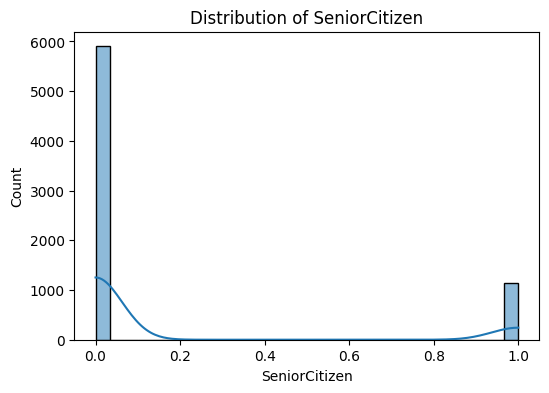

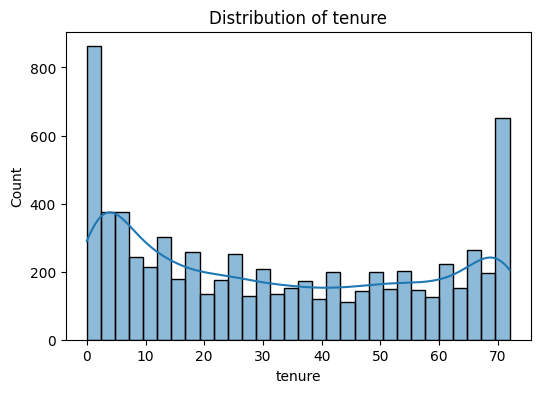

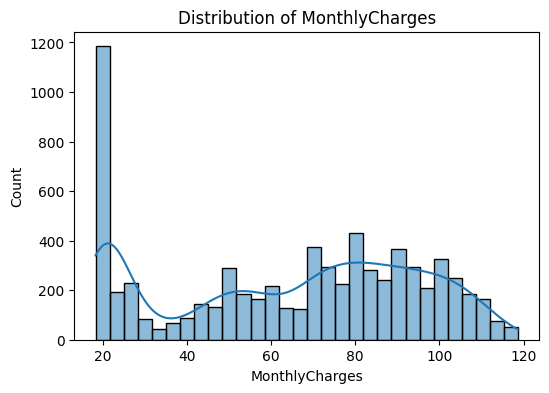

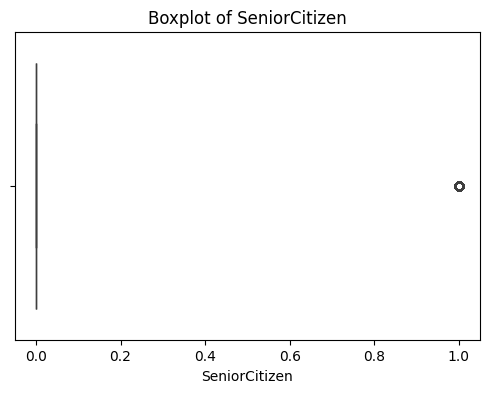

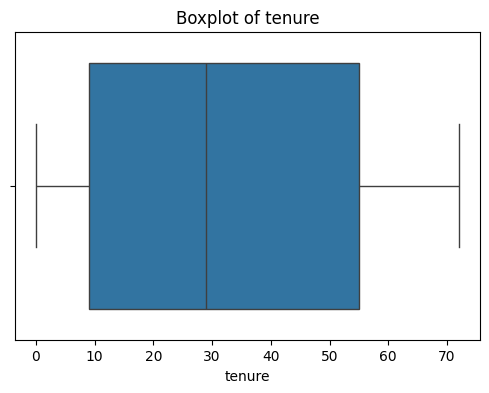

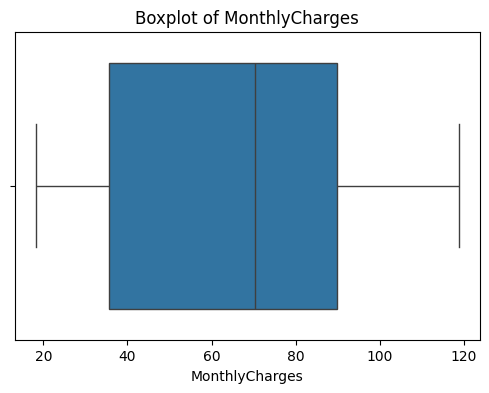

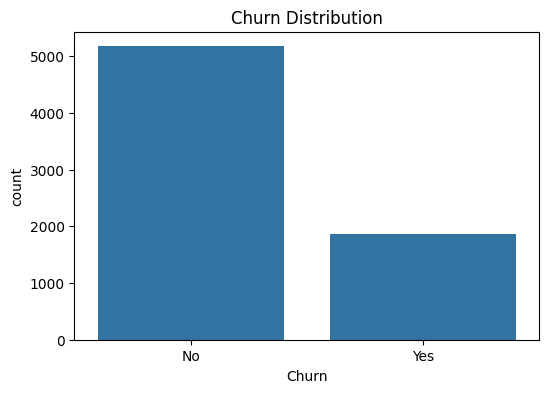


Churn proportion:
Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64


In [34]:
# Visualizations

# 7a: Numeric columns distributions
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(telco[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.show()

# 7b: Boxplots for numeric columns (outlier detection)
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=telco[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

# Churn target analysis
if 'Churn' in telco.columns:
    plt.figure(figsize=(6,4))
    sns.countplot(x='Churn', data=telco)
    plt.title('Churn Distribution')
    plt.show()
    
    print("\nChurn proportion:")
    print(telco['Churn'].value_counts(normalize=True))


### Feature Engineering
Feature engineering is the process of creating new features or transforming existing ones to improve model performance.

**Handle Categorical Variables:** <br>
Most machine learning models require numeric inputs. Categorical columns need encoding:

In [35]:
# Step 1: Drop irrelevant columns
# customerID is an identifier and not predictive
telco_cleaned = telco.drop(columns=['customerID'])

**Convert the target variable (Churn) to numeric (encoding target variable):**

In [36]:
telco_cleaned['Churn'] = telco_cleaned['Churn'].map({'Yes': 1, 'No': 0})

**Identify categorical columns (excluding target)**

In [37]:
categorical_cols = [col for col in telco_cleaned.select_dtypes(include=['object']).columns if col != 'Churn']

**One-hot encode categorical features (drop first category to prevent multicollinearity)**

In [38]:
telco_encoded = pd.get_dummies(telco_cleaned, columns=categorical_cols, drop_first=True)

**Feature Scaling (Optional but Recommended)**<br> 
Scaling ensures numerical features contribute equally to distance-based or gradient-based algorithms:

In [39]:
scaler = StandardScaler()
telco_encoded[numeric_cols] = scaler.fit_transform(telco_encoded[numeric_cols])

In [40]:
sns.set(style="whitegrid")

**Split features and target variable**

In [41]:
X = telco_encoded.drop('Churn', axis=1)
y = telco_encoded['Churn']

**Step 2: Train-test split (80/20) with stratification**

In [42]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

### Base Model Training

**Initialize and train Logistic Regression**

In [43]:
base_model = LogisticRegression(max_iter=1000)
base_model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


**Make predictions**

In [44]:
y_pred = base_model.predict(X_test)
y_proba = base_model.predict_proba(X_test)[:,1]

=== Base Model: Logistic Regression ===

Accuracy Score: 0.794889992902768
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1035
           1       0.63      0.54      0.58       374

    accuracy                           0.79      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.79      0.79      0.79      1409

ROC AUC Score: 0.8403213722906818


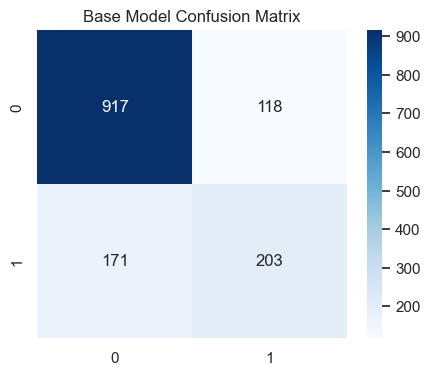

In [45]:
# Step 5: Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
print("=== Base Model: Logistic Regression ===\n")
print("Accuracy Score:", accuracy)
print(classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))

# Step 6: Confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Base Model Confusion Matrix")
plt.show()

### Feature Importance via Logistic Regression Coefficients

Top features increasing churn probability:


,feature,coefficient
1644,TotalCharges_20.5,1.333933
1637,TotalCharges_20.15,1.325517
1520,TotalCharges_19.9,1.323194
1636,TotalCharges_20.1,1.189924
1514,TotalCharges_19.6,1.134133
2516,TotalCharges_288.05,1.132385
9,InternetService_Fiber optic,1.109932
1521,TotalCharges_19.95,1.035374
1652,TotalCharges_20.9,1.032951
3850,TotalCharges_45.7,1.028817



Top features decreasing churn probability:


,feature,coefficient
6326,TotalCharges_89.25,-0.673461
3629,TotalCharges_422.4,-0.680345
23,Contract_One year,-0.681069
644,TotalCharges_134.05,-0.699876
3762,TotalCharges_44,-0.714349
2936,TotalCharges_335.75,-0.741528
1,tenure,-0.800550
954,TotalCharges_151.75,-0.828852
2067,TotalCharges_24.4,-0.864844
24,Contract_Two year,-1.301274


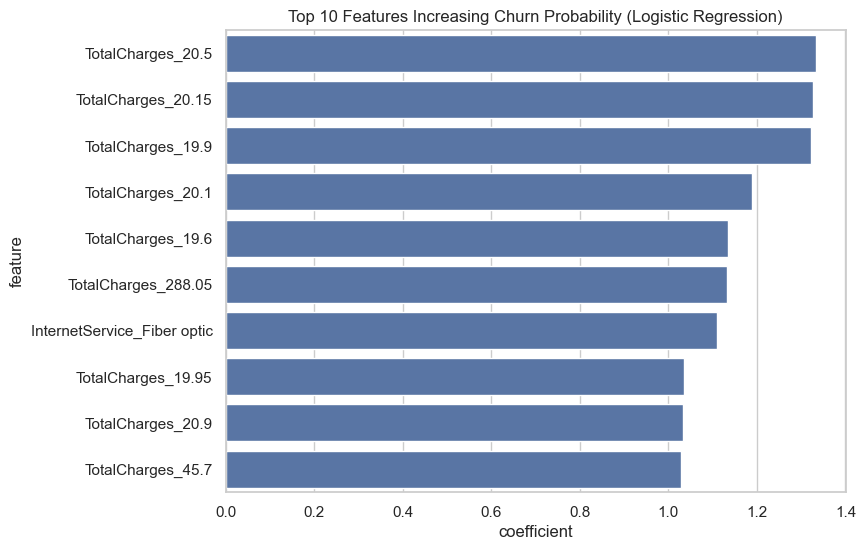

In [46]:
# Extract coefficients and feature names
coefficients = base_model.coef_[0]
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'coefficient': coefficients
}).sort_values(by='coefficient', ascending=False)

print("Top features increasing churn probability:")
display(feature_importance.head(10))

print("\nTop features decreasing churn probability:")
display(feature_importance.tail(10))

# Optional: Visualize
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

plt.figure(figsize=(8,6))
sns.barplot(x='coefficient', y='feature', data=feature_importance.head(10))
plt.title("Top 10 Features Increasing Churn Probability (Logistic Regression)")
plt.show()

In [47]:
# =========================================
# 2. Compare with More Advanced Models
# =========================================

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, roc_auc_score

# Random Forest
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
y_proba_rf = rf_model.predict_proba(X_test)[:,1]

print("Random Forest Performance:")
print(classification_report(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_rf))

# Gradient Boosting
gb_model = GradientBoostingClassifier(n_estimators=200, random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)
y_proba_gb = gb_model.predict_proba(X_test)[:,1]

print("\nGradient Boosting Performance:")
print(classification_report(y_test, y_pred_gb))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_gb))


Random Forest Performance:
              precision    recall  f1-score   support

           0       0.82      0.91      0.87      1035
           1       0.66      0.46      0.54       374

    accuracy                           0.79      1409
   macro avg       0.74      0.69      0.71      1409
weighted avg       0.78      0.79      0.78      1409

ROC-AUC: 0.8298251052726756

Gradient Boosting Performance:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1035
           1       0.65      0.49      0.56       374

    accuracy                           0.80      1409
   macro avg       0.74      0.70      0.71      1409
weighted avg       0.78      0.80      0.79      1409

ROC-AUC: 0.8457102999302487


In [48]:
# =========================================
# 4. Cross-Validation for Robust Evaluation
# =========================================

from sklearn.model_selection import cross_val_score, StratifiedKFold

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Logistic Regression cross-validation
log_cv_scores = cross_val_score(base_model, X, y, cv=cv, scoring='roc_auc')
print("Logistic Regression ROC-AUC CV Scores:", log_cv_scores)
print("Mean ROC-AUC:", log_cv_scores.mean())

# Random Forest cross-validation
rf_cv_scores = cross_val_score(rf_model, X, y, cv=cv, scoring='roc_auc')
print("Random Forest ROC-AUC CV Scores:", rf_cv_scores)
print("Mean ROC-AUC:", rf_cv_scores.mean())

Logistic Regression ROC-AUC CV Scores: [0.85449508 0.84379731 0.86352269 0.82584217 0.8349577 ]
Mean ROC-AUC: 0.8445229899128075
Random Forest ROC-AUC CV Scores: [0.84389806 0.82875817 0.84799271 0.81034438 0.82106249]
Mean ROC-AUC: 0.8304111621606115


=== Logistic Regression ===
Training Time: 1.2347 seconds
Train Accuracy: 0.8761
Test Accuracy: 0.7949
F1-Score (Test): 0.5842
ROC-AUC (Test): 0.8403

Classification Report (Test):
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1035
           1       0.63      0.54      0.58       374

    accuracy                           0.79      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.79      0.79      0.79      1409



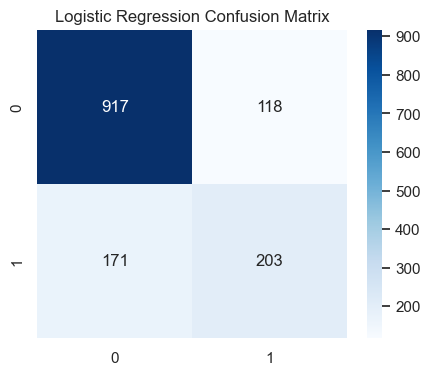

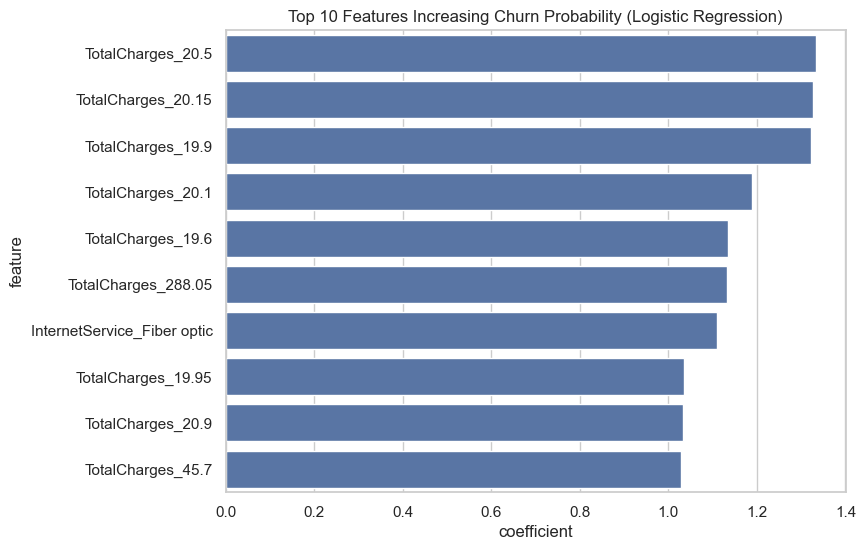

=== Random Forest ===
Training Time: 13.8548 seconds
Train Accuracy: 0.9980
Test Accuracy: 0.7942
F1-Score (Test): 0.5440
ROC-AUC (Test): 0.8298

Classification Report (Test):
              precision    recall  f1-score   support

           0       0.82      0.91      0.87      1035
           1       0.66      0.46      0.54       374

    accuracy                           0.79      1409
   macro avg       0.74      0.69      0.71      1409
weighted avg       0.78      0.79      0.78      1409



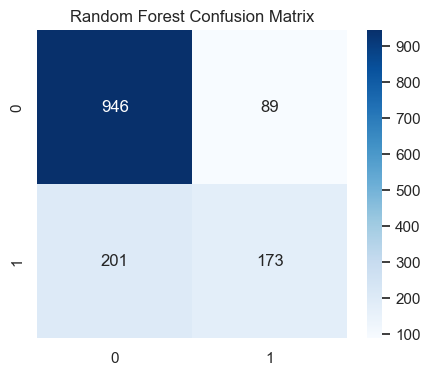

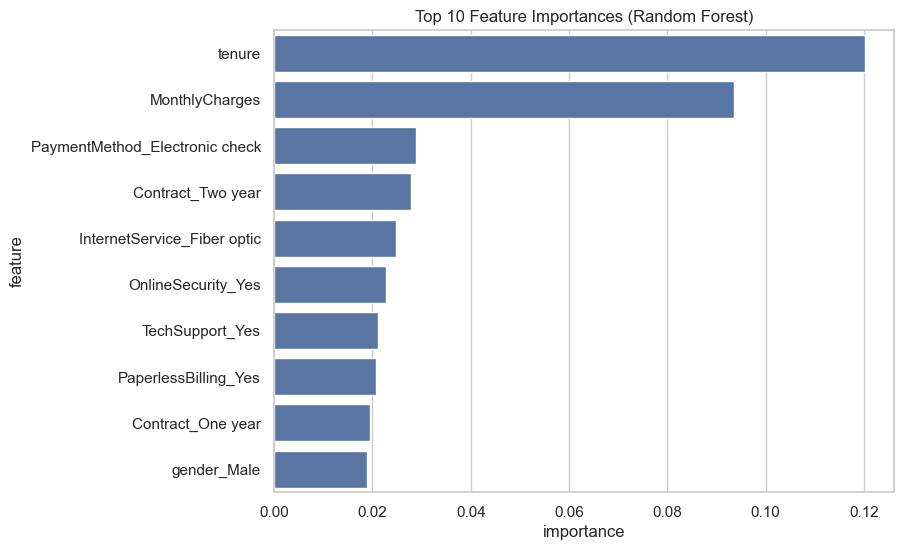

=== Gradient Boosting ===
Training Time: 29.9903 seconds
Train Accuracy: 0.8181
Test Accuracy: 0.7956
F1-Score (Test): 0.5583
ROC-AUC (Test): 0.8457

Classification Report (Test):
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1035
           1       0.65      0.49      0.56       374

    accuracy                           0.80      1409
   macro avg       0.74      0.70      0.71      1409
weighted avg       0.78      0.80      0.79      1409



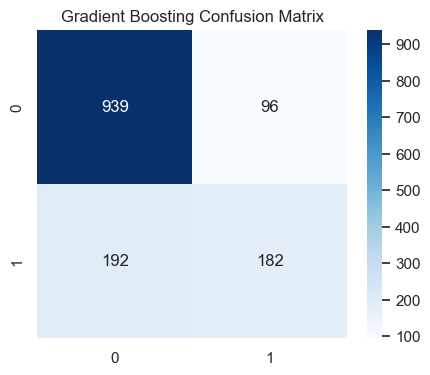


Logistic Regression Performance with Threshold = 0.3
              precision    recall  f1-score   support

           0       0.89      0.75      0.82      1035
           1       0.52      0.75      0.62       374

    accuracy                           0.75      1409
   macro avg       0.71      0.75      0.72      1409
weighted avg       0.80      0.75      0.76      1409

=== Cross-Validation ROC-AUC Scores ===
Logistic Regression: 0.8445
Random Forest: 0.8304
Gradient Boosting: 0.8467


In [49]:
# =========================================
# End-to-End Telco Churn ML Pipeline
# =========================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, f1_score, confusion_matrix

sns.set(style="whitegrid")

# -----------------------------
# Step 0: Prepare features & target
# -----------------------------
X = telco_encoded.drop('Churn', axis=1)
y = telco_encoded['Churn']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# -----------------------------
# Helper function to train & evaluate models
# -----------------------------
def train_evaluate_model(model, X_train, y_train, X_test, y_test, model_name="Model"):
    start_time = time.time()
    model.fit(X_train, y_train)
    end_time = time.time()
    
    train_time = end_time - start_time
    
    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    y_test_proba = model.predict_proba(X_test)[:,1] if hasattr(model, "predict_proba") else None
    
    # Metrics
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_pred)
    roc_auc = roc_auc_score(y_test, y_test_proba) if y_test_proba is not None else None
    
    # Print summary
    print(f"=== {model_name} ===")
    print(f"Training Time: {train_time:.4f} seconds")
    print(f"Train Accuracy: {train_accuracy:.4f}")
    print(f"Test Accuracy: {test_accuracy:.4f}")
    print(f"F1-Score (Test): {f1:.4f}")
    if roc_auc is not None:
        print(f"ROC-AUC (Test): {roc_auc:.4f}")
    print("\nClassification Report (Test):")
    print(classification_report(y_test, y_test_pred))
    
    # Confusion matrix
    plt.figure(figsize=(5,4))
    sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f"{model_name} Confusion Matrix")
    plt.show()
    
    return model

# -----------------------------
# Step 1: Base Model - Logistic Regression
# -----------------------------
base_model = LogisticRegression(max_iter=1000)
base_model = train_evaluate_model(base_model, X_train, y_train, X_test, y_test, "Logistic Regression")

# Feature importance for Logistic Regression
coefficients = base_model.coef_[0]
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'coefficient': coefficients
}).sort_values(by='coefficient', ascending=False)

plt.figure(figsize=(8,6))
sns.barplot(x='coefficient', y='feature', data=feature_importance.head(10))
plt.title("Top 10 Features Increasing Churn Probability (Logistic Regression)")
plt.show()

# -----------------------------
# Step 2: Advanced Model - Random Forest
# -----------------------------
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model = train_evaluate_model(rf_model, X_train, y_train, X_test, y_test, "Random Forest")

# Feature importance for Random Forest
rf_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': rf_model.feature_importances_
}).sort_values(by='importance', ascending=False)

plt.figure(figsize=(8,6))
sns.barplot(x='importance', y='feature', data=rf_importance.head(10))
plt.title("Top 10 Feature Importances (Random Forest)")
plt.show()

# -----------------------------
# Step 3: Advanced Model - Gradient Boosting
# -----------------------------
gb_model = GradientBoostingClassifier(n_estimators=200, random_state=42)
gb_model = train_evaluate_model(gb_model, X_train, y_train, X_test, y_test, "Gradient Boosting")

# -----------------------------
# Step 4: Threshold Tuning (Example for Logistic Regression)
# -----------------------------
y_proba = base_model.predict_proba(X_test)[:,1]
threshold = 0.3
y_pred_thresh = (y_proba >= threshold).astype(int)
print(f"\nLogistic Regression Performance with Threshold = {threshold}")
print(classification_report(y_test, y_pred_thresh))

# -----------------------------
# Step 5: Cross-Validation (ROC-AUC)
# -----------------------------
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
log_cv_scores = cross_val_score(base_model, X, y, cv=cv, scoring='roc_auc')
rf_cv_scores = cross_val_score(rf_model, X, y, cv=cv, scoring='roc_auc')
gb_cv_scores = cross_val_score(gb_model, X, y, cv=cv, scoring='roc_auc')

print("=== Cross-Validation ROC-AUC Scores ===")
print(f"Logistic Regression: {log_cv_scores.mean():.4f}")
print(f"Random Forest: {rf_cv_scores.mean():.4f}")
print(f"Gradient Boosting: {gb_cv_scores.mean():.4f}")
